## 사이파이

p-value가 0.05 이하 -> 귀무가설 기각, 대립가설 채택

In [6]:
from scipy import stats
dir(stats)

['ConstantInputWarning',
 'DegenerateDataWarning',
 'FitError',
 'NearConstantInputWarning',
 'NumericalInverseHermite',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_common',
 '_constants',
 '_continuous_distns',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_hypotests_pythran',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multivariate',
 '_mvn',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_tukeylambda_stats',
 '_unuran',
 '_variation',
 '_warnings_errors',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsi

## 정규성 검정

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')

display(df)
from scipy.stats import shapiro
print(shapiro(df))

#p-value>0.05 -> 귀무가설 채택
#귀무가설 : 정규성을 가진다

,data
0,295.979767
1,289.703739
2,300.609670
3,299.890856
4,293.159612
...,...
995,299.901120
996,307.387808
997,303.869390
998,313.979589


ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


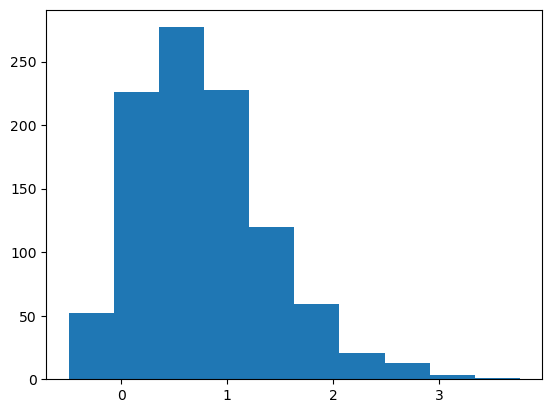

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

print(shapiro(df))

#p-value<0.05 이므로 귀무가설 기각, 대립가설 채택
# 대립가설 : 정규성을 가지지 않는다

In [21]:
#다음 데이터를 log변환 한 후에 정규성을 가지는지 확인하라
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')

np.log1p(df)

#log1p 는 1더한 값의 로그
#log10은 10을 밑으로 하는 로그
#log는 자연로그

from scipy.stats import shapiro
print(shapiro(np.log1p(df)))

#p-value > 0.05 이므로 귀무가설 기각X
#귀무가설 : 정규성을 가진다

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


#### anderson

In [100]:
#다음 데이터의 정규성을 검증
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')

from scipy.stats import shapiro
print(shapiro(df))

# p-value > 0.05 이므로 귀무가설 기각 X
# 귀무가설 : 정규성을 가진다

#경고가 뜬다
# 5000개 초과의 샘플에 대해서는 샤피로검정은 정확하지 않을 수 있다

from scipy.stats import anderson
#anderson은 리스트형식으로 받는다
display(df['data'])
print(anderson(df['data'].values))

#statistic은 검정통계량
#critical_values은 임계값
#significance_level은 유의수준
#significance_level이 5인 값은 3번째 값
#0.82 > 0.786 으로 검정통계량이 더 크므로 귀무가설 기각
# 대립가설 : 정규성을 가지지 않는다

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0       296.016803
1       299.628476
2       298.232057
3       293.256749
4       301.037710
           ...    
5995    304.008424
5996    301.043219
5997    302.542420
5998    294.456145
5999    301.733819
Name: data, Length: 6000, dtype: float64

AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


### 단일표본 t검정(one-sample)

In [39]:
#100명의 키 정보가 들어있는 데이터가 있다.
#데이터가 정규성을 만족하는지 확인하라
#평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후
#유의수준 5%로 검정하라

import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

#정규성 검정
print(shapiro(df))
#p-value>0.05

#정규성 검정을 만족하기 때문에 단일표본 검정으로 확인
print(ttest_1samp(df['height'],165))
#p-value<0.05
#귀무가설 기각
#대립가설 : 평균키는 165가 아니다

#만약, 정규성을 만족하지 않는다면 비모수 검정을 진행
#윌콕슨 부호순위 검정
print(wilcoxon(df['height']-165))
#p-value<0.05
#귀무가설 기각
#대립가설 : 평균키는 165가 아니다

ShapiroResult(statistic=0.9872668981552124, pvalue=0.4558176100254059)
Ttest_1sampResult(statistic=3.2017884987150644, pvalue=0.0018367171548080209)


WilcoxonResult(statistic=1651.0, pvalue=0.002654951754186932)

In [54]:
#100명의 키 정보가 들어있는 데이터가 있다.
#데이터가 정규성을 만족하는지 확인하라
#평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후
#유의수준 5%로 검정하라
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

#정규성 검정
print(shapiro(df))
#p-value<0.05
#귀무가설 기각
# 대립가설 : 정규성을 만족하지 않는다

#정규성을 만족하지 않으므로 비모수 겸정을 진행
#윌콕슨
print(wilcoxon(df['height']-165))
#p-value<0.05
#귀무가설 기각
#대립가설 : 평균은 165가 아니다

ShapiroResult(statistic=0.9672006368637085, pvalue=0.013552471995353699)
WilcoxonResult(statistic=1952.0, pvalue=0.04880534424649582)


0     17.012475
1      1.857081
2     -5.366735
3     -5.366735
4      4.428478
        ...    
95    -4.762309
96    -5.366735
97     9.777363
98    -5.366735
99    -0.252676
Name: height, Length: 100, dtype: float64

### 등분산 검정

In [101]:
#두개 학급의 시험성적에 대한 데이터이다
#그룹간 등분산 검정을 시행하라

import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

a_score = df[df['class'] == 'A']['score']
b_score = df[df['class'] == 'B']['score']

from scipy.stats import bartlett
print(bartlett(a_score, b_score))

#p-value>0.05
#귀무가설 기각X
#귀무가설 분산이 같다

from scipy.stats import fligner
print(fligner(a_score,b_score,center='median')) #default
print(fligner(a_score,b_score, center='mean')) 

from scipy.stats import levene
print(levene(a_score,b_score, center='median')) #default
print(levene(a_score,b_score))

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)


In [78]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')

a_score = df[df['class'] == 'A']['score']
b_score = df[df['class'] == 'B']['score']

print(len(a_score))
print(len(b_score))


from scipy.stats import bartlett
print(bartlett(a_score, b_score))

from scipy.stats import fligner
print(fligner(a_score,b_score)) #default 

from scipy.stats import levene
print(levene(a_score,b_score)) #default

#Fligner, Levene p-value<0.05이므로 귀무가설 기각
#분산이 다르다

300
180
BartlettResult(statistic=1.5116783794562305, pvalue=0.2188831590902503)
FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)


#### 등분산 검정에 대해

bartlett검정
* 모든 그룹에서 표본 크기가 동일
* 모집단이 정규분포에 따름

fligner, levene검정
* 표본 크기 동일안해도 됨
* 모집단이 정규분포에 따르지않아도 됨

In [72]:
#두개학급의 시험성적 데이터 그룹간 등분산 검정 시행
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')

dir(stats)
from scipy.stats import bartlett, fligner, levene

print(bartlett(df['A'], df['B']))
print(fligner(df['A'], df['B']))
print(fligner(df['A'], df['B']))

#표본크기가 같으므로 bartlett을 보자
#p-value>0.05 이므로 귀무가설 기각 x
#분산이 같다


ShapiroResult(statistic=0.9551980495452881, pvalue=5.150133652875866e-09)
BartlettResult(statistic=2.383217881104806, pvalue=0.12264468401742169)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)


In [76]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

from scipy.stats import bartlett, fligner, levene

print(bartlett(df['A'], df['B'].dropna()))
print(fligner(df['A'], df['B'].dropna()))
print(levene(df['A'], df['B'].dropna()))

#표본크기가 다르므로 Fligner과 Levene를 보자
#p-value < 0.05이므로 귀무가설 기각
#분산이 다르다

BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)


### 독립표본 검정

독립 표본 t 검정의 경우 집단의 정규성에 따라 접근방식이 다르다  
정규성 검정  
shapiro  
anderson(샘플 5000개 이상)  
  
데이터가 정규성을 가진다 -> 모수적 검정 :  
    두 집단의 등분산 검정을 한 후  
    from scipy.stats import ttest_ind  
데이터가 정규성을 가지지 않는다 -> 비모수적 검정  

In [90]:
#두개 학급의 시험성적에 대한 데이터이다
#두 학습의 시험 평균(비모수검정의 경우 중위값)은 동이랗다 말할수 있는지확인

import pandas as pd 
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))
print('정규성 검정 결과 : 두 데이터 모두 정규성을 따른다\n')

from scipy.stats import bartlett, levene
print(bartlett(df1['data'], df2['data']))
print(levene(df1['data'], df2['data']),'\n')

print('만약, 등분산성을 가진다고 하자')

from scipy.stats import ttest_ind
print(ttest_ind(df1, df2, equal_var=True))
#p-value<0.05이기 때문에 귀무가설 기각
#대립가설 : 각 그룹의 평균은 동일하지 않다

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)
정규성 검정 결과 : 두 데이터 모두 정규성을 따른다

BartlettResult(statistic=4.170597307474754, pvalue=0.04113129672708929)
LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093) 

만약, 정규성을 등분산성을 가진다고 하자
Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))


In [92]:
#두개 학급의 시험성적에 대한 데이터이다
# 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

print(shapiro(df['A']))
print(shapiro(df['B'].dropna()))

#두 그룹중 한 그룹만 정규성을 위배해도 독립표본 t-검정을 할 수 없다

#정규성을  위배하므로 비모수 검정을 실시한다
from scipy.stats import mannwhitneyu, ranksums
print()
print(mannwhitneyu(df['A'], df['B'].dropna()))
print(ranksums(df['A'], df['B'].dropna()))
#p-value>0.05 귀무가설기각x
#평균은 같다

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0
...,...,...
295,80,NaN
296,30,NaN
297,91,NaN
298,84,NaN


In [102]:
# 두 개 그룹에 대한 수치형 데이터
# 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

a = df[df['group'] == 'a']['data']
b = df[df['group'] == 'b']['data']

from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

#두 그룹 모두 귀무가설을 기각할 수 없다(정규성을 가진다)

from scipy.stats import levene
print()
print(levene(a,b))

# 귀무가설을 기각, 대립가설을 채택한다. 즉, 등분산성을 가지지 않는다

from scipy.stats import ttest_ind
print(ttest_ind(a,b,equal_var=False))

#p-value < 0.05 이므로 귀무가설 기각, 대립가설 채택. 즉, 평균이 다르다

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)


In [106]:
#두개 그룹에 대한 수치형 데이터이다.
#두 그룹은 평균은 동일하다 말할 수 있는지 검정

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

display(df)

,a,b
0,121.023118,69.982090
1,69.740978,139.774624
2,93.737693,175.425924
3,100.331645,85.493555
4,75.048925,83.488953
...,...,...
115,97.955501,NaN
116,116.839209,NaN
117,88.257448,NaN
118,89.904714,NaN


In [116]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')


a = df['a']
b = df['b'].dropna()


#정규성 검정
from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))
#정규성을 가진다

#등분산성 검정
from scipy.stats import levene
print(levene(a,b))
#등분산성을 가지지 않는다

#ttest_ind
from scipy.stats import ttest_ind
print(ttest_ind(a,b,equal_var=False))
#평균은 같다

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)
LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)
Ttest_indResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704)


### 대응표본 t 검정(paired)

In [120]:
#특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다
#투약 전후의 변화가 있는지 검정하라

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

from scipy.stats import shapiro

a = df['after']
b = df['before']
print(shapiro(b))
print(shapiro(a))

from scipy.stats import levene
print()
print(levene(b,a))

from scipy.stats import ttest_rel
print(ttest_rel(b,a))
#귀무가설 기각 -> 전 후는 평균이 같지 않다

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)
Ttest_relResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513)


In [124]:
#특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다
#투약 전후의 변화가 있는지 검정하라

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')


b = df['before']
a = df['after']


from scipy.stats import shapiro
print(shapiro(b))
print(shapiro(a))
#정규성 가짐

from scipy.stats import levene
print()
print(levene(b, a))
#등분산성 가짐

from scipy.stats import ttest_rel
print(ttest_rel(b, a))
#귀무가설 기각 X -> 투약전후가 같다

ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)

LeveneResult(statistic=1.3463330638203617, pvalue=0.24708279045237214)
Ttest_relResult(statistic=0.188900575991026, pvalue=0.8504925317234707)


In [131]:
#특정 집단의 학습 전후 시험 성적 변화를 나타낸 데이터
#시험 전과 후에 차이가 있는지 검정

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

from scipy.stats import shapiro

b = df['before']
a = df['after']
print(shapiro(b))
print(shapiro(a))
#정규성 가지지 않음

from scipy.stats import levene
print(levene(b, a))
#등분산성 가짐

from scipy.stats import wilcoxon
print(wilcoxon(b,a))
#정규성을 가지지 않으므로 wilcoxon으로 진행
#귀무가설 기각X

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)
LeveneResult(statistic=0.14329522146179022, pvalue=0.7058456563194881)
WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


In [138]:

#한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다
#b상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')


a = df[df['group'] == 'a']['rpm']
b = df[df['group'] == 'b']['rpm']

from scipy.stats import shapiro

print(shapiro(a))
print(shapiro(b))
#정규성을 가짐

from scipy.stats import levene

print(levene(a, b))
#등분산성 가짐

from scipy.stats import ttest_rel
print(ttest_rel(a,b,alternative='greater'))
#greater의 의미는 a>b가 대립가설이 된다는 것이다
#귀무가설은 a<=b
#b가 더 높다고 할 수 있다

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)
LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)
Ttest_relResult(statistic=-1.9018108294460812, pvalue=0.9693143365355352)


## 카이제곱검정(교차분석)

* 일원 카이제곱검정  
한 개의 요인에 의해 k개의 범주를 가질 때, 이론적 분포를 따르는지 검정  
* 이원 카이제곱검정  
모집단이 두 개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정

In [2]:
# 144회 주사위를 던졌을 때,
# 각 눈금별로 나온 횟수를 나타낸다.
# 이데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
df
# print(chisquare(df['counts'], df['expected']))

#귀무가설 기각X
#각 주사위 눈금 발생비율은 동일함

,dice_number,counts,expected
0,1,24,24
1,2,20,24
2,3,28,24
3,4,22,24
4,5,28,24
5,6,22,24


In [166]:
#다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다.
#인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다
#이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라

import pandas as pd 
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')

df = df1.value_counts().to_frame('count')
df['expected'] = [df['count'].sum() * 0.8, df['count'].sum() * 0.2]
display(df)

from scipy.stats import chisquare
print(chisquare(df['count'], df['expected']))
#귀무가설 기각
#대립가설 : 왼손과 오른손 잡이의 비율이 적합하지 않다

,count,expected
hands,,
right,420,400.0
left,80,100.0


Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


In [171]:
#다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정

import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
cdf = pd.crosstab(df['측정회원성별'], df['등급'])
display(cdf)

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
#p-value 2번째꺼
#귀무가설 기각
#귀무가설 : 성별, 등급은 독립적이다
#대립가설 : 독립적이지않다(관련이 있다)

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


(120.06233631119409, 7.481892813401677e-26, 3, array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))


In [172]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)

In [179]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)

cdf = df.iloc[0:2, 0:2]
display(cdf)

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
#귀무가설 기각 X
#귀무가설 : 성별과 참석은 독립적이다

#5보다 작은 셀이 20%가 넘으므로 피셔의 정확검정을 사용해야한다
from scipy.stats import fisher_exact
print(fisher_exact(cdf))
#귀무가설 기각
#성별과 참석은 독립적이다

,불참,참석
남성,4,2
여성,1,9


(3.277575757575758, 0.07023259819117404, 1, array([[1.875, 4.125],
       [3.125, 6.875]]))
(18.0, 0.03571428571428571)


### anova

###### 세 집단 이상 검정

In [12]:
# x1, x2, x3의 변수들의 평균의 차이가 존재하는지 검정하라

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova.csv')

df1 = df['x1']
df2 = df['x2']
df3 = df['x3']

from scipy.stats import shapiro

print(shapiro(df1))
print(shapiro(df2))
print(shapiro(df3))
# 모두 정규성 만족

from scipy.stats import levene
print(levene(df1, df2, df3))
# 등분산 만족

from scipy.stats import f_oneway
print(f_oneway(df1, df2, df3))
#p-value<0.05
#귀무가설 기각
#대립가설 : 평균 차이가 있다

ShapiroResult(statistic=0.9979789853096008, pvalue=0.27395427227020264)
ShapiroResult(statistic=0.9979418516159058, pvalue=0.2591271996498108)
ShapiroResult(statistic=0.9987621307373047, pvalue=0.7300694584846497)
LeveneResult(statistic=2.71270174202054, pvalue=0.06652021922816238)
F_onewayResult(statistic=209.88499932318638, pvalue=4.919152988455592e-86)


In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova2.csv')

df1 = df['x1']
df2 = df['x2']
df3 = df['x3']

from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))
print(shapiro(df3))

from scipy.stats import levene
print(levene(df1, df2, df3))

from scipy.stats import f_oneway
print(f_oneway(df1, df2, df3))

#귀무가설 기각X
#평균이 동일하다

ShapiroResult(statistic=0.9886645078659058, pvalue=0.5584133863449097)
ShapiroResult(statistic=0.9924368858337402, pvalue=0.8519019484519958)
ShapiroResult(statistic=0.9848724007606506, pvalue=0.31092315912246704)
LeveneResult(statistic=1.845797549925243, pvalue=0.15970603203148068)
F_onewayResult(statistic=2.386152612702158, pvalue=0.09374426938585284)


In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova8.csv')

data = df[df.target=='a'].value
data2 = df[df.target=='b'].value
data3 = df[df.target=='c'].value

from scipy.stats import shapiro
print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))
#하나의 변수가 정규성을 가지지 않는다 - 비모수 검정

from scipy.stats import levene
print(levene(data, data2, data3))
#등분산 만족

from scipy.stats import kruskal
#비모수 검정을 위해 kruskal을 사용한다
print(kruskal(data, data2, data3))
#평균차이가 존재한다

ShapiroResult(statistic=0.9666392207145691, pvalue=0.012299093417823315)
ShapiroResult(statistic=0.9713972210884094, pvalue=0.10934212058782578)
ShapiroResult(statistic=0.9651247262954712, pvalue=0.41566193103790283)
LeveneResult(statistic=1.4817966330841852, pvalue=0.2297504921313145)
KruskalResult(statistic=6.9277037668798584, pvalue=0.03130893110123)


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova.csv')

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
dfm = df.melt()
display(dfm)
model = ols('value ~ C(variable)', dfm).fit()
print(anova_lm(model))

,variable,value
0,x1,211.363083
1,x1,117.428643
2,x1,231.636723
3,x1,244.284666
4,x1,242.221433
...,...,...
2995,x3,395.439481
2996,x3,282.016732
2997,x3,264.838466
2998,x3,310.191301


                 df        sum_sq       mean_sq           F        PR(>F)
C(variable)     2.0  3.774347e+06  1.887173e+06  209.884999  4.919153e-86
Residual     2997.0  2.694742e+07  8.991464e+03         NaN           NaN


In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova2.csv')

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

mdf = df.melt()

model = ols('value ~ C(variable)', mdf).fit()
print(anova_lm(model))

                df         sum_sq      mean_sq         F    PR(>F)
C(variable)    2.0    4856.241506  2428.120753  2.386153  0.093744
Residual     297.0  302223.696757  1017.588205       NaN       NaN
